In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9ec51996476e400c8cd4ce111cfb4170 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jIeaKbYr0DwJIpOlTEHXuiZgneem-ry9EH5GfiNYUqL3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9ec51996476e400c8cd4ce111cfb4170.get_object(Bucket='default-donotdelete-pr-4eo6vhlqsef9hz',Key='ASNM-CDX-2009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body,sep=';',index_col='id').select_dtypes(exclude=['object'])
data=data.drop([c for c in list(data) if data[c].nunique() is 1],axis=1)
data.head()


,label_2,SrcPort,DstPort,SrcIPInVlan,DstIPInVlan,InPkt1s10i[0],InPkt1s10i[1],InPkt1s10i[2],InPkt1s10i[3],InPkt1s10i[4],...,GaussProds4All[2],GaussProds4All[3],GaussProds8All[0],GaussProds8All[1],GaussProds8All[2],GaussProds8All[3],GaussProds8All[4],GaussProds8All[5],GaussProds8All[6],GaussProds8All[7]
id,,,,,,,,,,,,,,,,,,,,,
1,False,63637,5222,True,True,5,0,0,0,0,...,39.854715,13.226058,30.142188,27.376107,65.213653,28.129521,98.002262,34.486082,26.990536,16.262570
2,False,2201,80,False,True,1,0,0,0,0,...,42.446332,10.750317,25.283971,25.283971,15.870392,175.667483,27.907473,62.828639,26.862012,14.797450
3,False,2201,80,False,True,1,3,0,2,0,...,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450
4,False,2202,443,False,True,1,2,0,1,0,...,42.162261,11.164318,25.275107,24.760861,25.046723,478.845737,99.885190,19.688286,31.250377,14.821825
5,False,2203,80,False,True,4,2,2,3,2,...,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5771 entries, 1 to 5771
Columns: 839 entries, label_2 to GaussProds8All[7]
dtypes: bool(4), float64(331), int64(504)
memory usage: 36.8 MB


In [6]:
data.describe()

,SrcPort,DstPort,InPkt1s10i[0],InPkt1s10i[1],InPkt1s10i[2],InPkt1s10i[3],InPkt1s10i[4],InPkt1s10i[5],InPkt1s10i[6],InPkt1s10i[7],...,GaussProds4All[2],GaussProds4All[3],GaussProds8All[0],GaussProds8All[1],GaussProds8All[2],GaussProds8All[3],GaussProds8All[4],GaussProds8All[5],GaussProds8All[6],GaussProds8All[7]
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,...,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,39220.685843,340.984925,7.046959,7.456247,7.514815,6.808525,7.348986,6.960319,6.873332,7.116271,...,52.997624,16.450495,22.062825,29.577259,118.589119,40.282891,112.217032,59.488651,32.538063,16.191687
std,24358.193471,725.021824,7.289772,9.367462,9.934251,9.687397,9.813364,9.831033,9.593184,9.726012,...,27.213690,8.678672,11.592764,20.182041,76.973307,60.324614,86.172839,52.455015,35.952925,6.978461
min,1032.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3981.500000,80.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,31.481918,13.669718,15.243286,25.029644,50.895882,19.032869,38.144083,28.710093,22.347789,14.791910
50%,54457.000000,80.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,60.799822,13.669718,23.817482,27.633154,106.651292,29.236968,84.481713,29.286233,30.244259,16.262570
75%,56996.000000,443.000000,8.000000,7.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,...,67.949911,17.077766,30.142188,33.082724,195.268837,30.527151,187.688933,94.389872,31.702502,16.289161
max,65533.000000,5222.000000,34.000000,41.000000,42.000000,41.000000,42.000000,41.000000,41.000000,41.000000,...,295.833151,152.628150,152.913247,194.958609,485.259912,576.637652,570.721134,468.445811,470.140068,153.011199


In [7]:
#check any null value in data
data.isnull().values.any()

False

False    5727
True       44
Name: label_2, dtype: int64

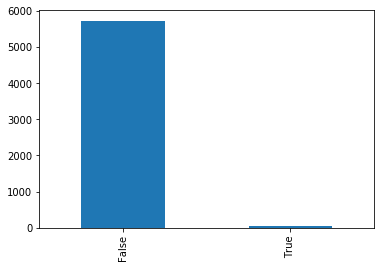

In [9]:
#visualization of distribution of legitimate and buffer overflow attack in network flows
count_classes=pd.value_counts(data['label_2'])
count_classes.plot(kind='bar')
count_classes

In [10]:
useful_data=data[(c for c in list(data) if data['label_2'].corr(data[c])>0.3)]
useful_data #11 columns selected

,label_2,PolyInd3ordOut[1],PolyInd5ordOut[5],PolyInd8ordOut[6],PolyInd8ordOut[8],PolyInd13ordOut[10],GaussProds4In[2],GaussProds2Out[0],GaussProds4Out[1],GaussProds4All[0],GaussProds8All[1]
id,,,,,,,,,,,
1,False,-35.000000,7.410509,629.499612,87.346347,-53.566841,0.000000,27.932563,3.031384,17.460909,27.376107
2,False,-95.571429,531.010539,-8361.421022,-1349.653131,3126.615066,6.873797,15.870392,26.156893,12.400587,25.283971
3,False,-438.000000,156.808352,2637.539433,392.817837,-482.794129,0.000000,60.655334,6.634477,15.870392,26.156893
4,False,-84.000000,664.205100,-2226.988110,-363.411860,945.491280,17.204436,22.921652,50.780670,14.570249,24.760861
5,False,-438.000000,156.808352,2637.539433,392.817837,-482.794129,0.000000,60.655334,6.634477,15.870392,26.156893
6,False,-61.000000,647.927758,1684.161072,266.155566,-476.497966,0.000000,26.485170,62.930796,15.813617,24.902680
7,False,174.661736,0.810859,8409.904256,-7053.104965,-2063.023110,154.871038,25.185437,31.761577,14.975142,23.649566
8,False,152.521044,-3.264781,6272.342790,-5246.655624,-1577.808921,296.575547,23.443215,31.517826,14.975142,23.649566
9,False,-5.861385,-2.310492,1.336327,-3.496043,-32.089088,48.476017,3.069731,4.343026,22.985543,43.539238


0.007682905535184215


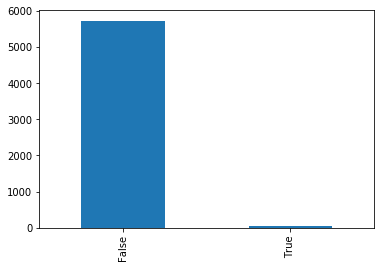

In [11]:
#visualization of distribution of legitimate and buffer overflow attack in network flows
count_classes=pd.value_counts(useful_data['label_2'])
count_classes.plot(kind='bar')
outlier_fraction=count_classes[1]/count_classes[0]#calculating fraction of outliers
print(outlier_fraction)

In [13]:
import numpy as np
#dividing data into X and Y
columns=useful_data.columns.tolist()
columns=[c for c in columns if c not in ["label_2"]]
target="label_2"
state=np.random.RandomState(42)
X=useful_data[columns]
# X=preprocessing.normalize(useful_data[columns])
Y=useful_data[target].astype(int)
print(X.shape)
print(Y.shape)

(5771, 10)
(5771,)


In [14]:
from sklearn.model_selection import train_test_split

train_x,test_x,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
train_x,cv_x,y_train,y_cv = train_test_split(train_x, y_train, test_size=0.25, random_state=42)

In [15]:
print('Training Shape : ',train_x.shape)
print('Cross-Validation Shape : ',cv_x.shape)
print('Test Shape : ',test_x.shape)





Training Shape :  (3246, 10)
Cross-Validation Shape :  (1082, 10)
Test Shape :  (1443, 10)


In [17]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

#three algorithms
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn import preprocessing
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=[False,True]

In [18]:
#preparing a dictionary of 3 classifiers
classifiers={
    "Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=state,verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,
                                              contamination=outlier_fraction,novelty=True),
    "Support Vector Machine":OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
}

In [19]:
n_outliers=count_classes[0]
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=='Local Outlier Factor':
        clf.fit(train_x)
        y_pred_cv = clf.predict(cv_x)
        y_pred_test = clf.predict(test_x)
        scores_prediction=clf.negative_outlier_factor_
    elif clf_name=='Support Vector Machine':
        clf.fit(train_x)
        y_pred_cv=clf.predict(cv_x)
        y_pred_test = clf.predict(test_x)
    else:
        clf.fit(train_x)
        scores_prediction=clf.decision_function(X)
        y_pred_cv=clf.predict(cv_x)
        y_pred_test = clf.predict(test_x)
    y_pred_cv[y_pred_cv==1]=0
    y_pred_cv[y_pred_cv==-1]=1

    y_pred_test[y_pred_test==1]=0
    y_pred_test[y_pred_test==-1]=1

    n_errors_cv=(y_pred_cv!=y_cv).sum()
    n_errors_test = (y_pred_test!=y_test).sum()
    print()
    print(clf_name.upper())
    print()
    print("Number of wrong predictions for Cross-Validation set : {}".format(n_errors_cv))
    print("Number of wrong predictions for Test set : {}".format(n_errors_test))
    print("\nCross-Validation Accuracy Score : ")
    print(accuracy_score(y_cv,y_pred_cv))
    print("\nTest Classification report : ")
    print(classification_report(y_test,y_pred_test))
    #pd.DataFrame(y_pred,y_cv).to_csv("output"+clf_name+".csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:250: UserWarning: max_samples (5771) is greater than the total number of samples (3246). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationW


ISOLATION FOREST

Number of wrong predictions for Cross-Validation set : 8
Number of wrong predictions for Test set : 14

Cross-Validation Accuracy Score : 
0.9926062846580407

Test Classification report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1431
           1       0.25      0.08      0.12        12

   micro avg       0.99      0.99      0.99      1443
   macro avg       0.62      0.54      0.56      1443
weighted avg       0.99      0.99      0.99      1443


LOCAL OUTLIER FACTOR

Number of wrong predictions for Cross-Validation set : 14
Number of wrong predictions for Test set : 27

Cross-Validation Accuracy Score : 
0.9870609981515711

Test Classification report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1431
           1       0.00      0.00      0.00        12

   micro avg       0.98      0.98      0.98      1443
   macro avg       0.50      0.49 

In [20]:
X=data[columns]
# X=preprocessing.normalize(useful_data[columns])
Y=data[target].astype(int)

In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(train_x)
y_pred_cv=kmeans.predict(cv_x)
y_pred_test=kmeans.predict(test_x)
print('KMEANS')
print()
print('Cross-Validation Accuracy : ',accuracy_score(y_cv,y_pred_cv))
print('Test Classification Report\n',classification_report(y_test,y_pred_test))

KMEANS

Cross-Validation Accuracy :  0.9916820702402958
Test Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1431
           1       0.39      0.58      0.47        12

   micro avg       0.99      0.99      0.99      1443
   macro avg       0.69      0.79      0.73      1443
weighted avg       0.99      0.99      0.99      1443

